In [1]:
# Basic imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
logins = pd.read_json('../data/raw/logins.json')

In [3]:
# To sum login counts by time, I create a new column with a 1 for each row.
logins['login_count'] = 1

In [4]:
# Resampling at a 15 minute interval and summing the result.
logins = logins.set_index('login_time').resample('15min').sum()

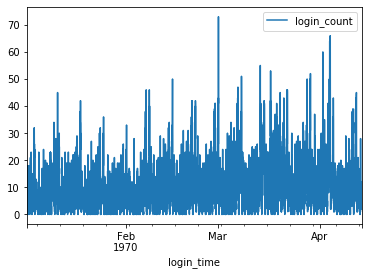

In [5]:
# It is difficult to get a clear picture of any patterns by plotting the entire dataset.

_ = logins.plot()

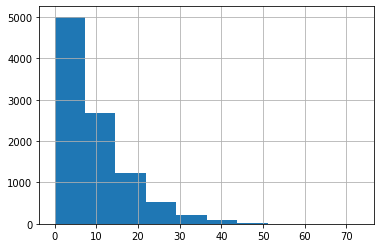

In [6]:
# A histogram shows an exponential distribution of login counts.

logins.login_count.hist()

<BarContainer object of 24 artists>

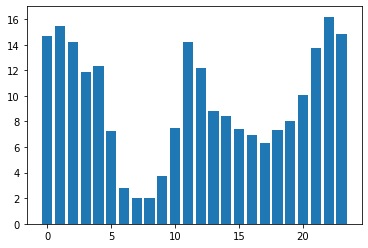

In [7]:
# Plotting the mean counts by hour shows the daily pattern.
# Early mornings are slow, with peaks around noon and late at night.

hours = np.empty(24)

for i in range(24):
    hours[i] = logins[logins.index.hour == i].mean()
    
plt.bar(range(24), hours)

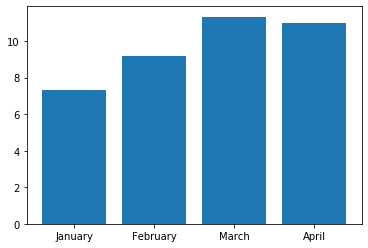

In [8]:
# Plotting mean counts by month shows some growth in login counts.
# More data would be needed to know if this true growth or part of a yearly trend.

months = np.empty(4)

for i in range(4):
    months[i] = logins[logins.index.month == i + 1].mean()
    
plt.bar(range(1, 5), months)
_ = plt.xticks(range(1, 5),
               labels=['January', 'February', 'March', 'April'])

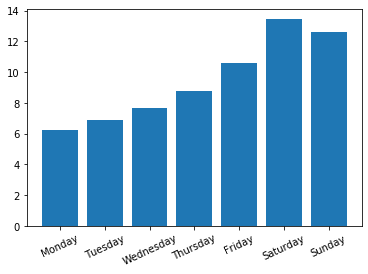

In [9]:
# Plotting by weekday shows the weekly patterns.
# Logins increase throughout the week, with the most logins during the weekend.

weekday = np.empty(7)

for i in range(7):
    weekday[i] = logins[logins.index.weekday == i].mean()
    
plt.bar(range(7), weekday)
_ = plt.xticks(range(7),
               labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
               rotation = 25)